In [1]:
import numpy as np
import pandas as pd
import scipy as scp
import itertools as it
import seaborn as sns
import matplotlib.pyplot as plt

from sys_resolve_atoms import sys_resolve_atoms

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
def plot_freq_vs_massa(n, massas, ks, indice_variacao_massa, valor_variacao_massa, titulo):
    frequencias_data = []
    
    for m_val in valor_variacao_massa:
        massas_atuais = list(massas) # Cria uma cópia para não modificar a original
        massas_atuais[indice_variacao_massa] = m_val
        
        system = sys_resolve_atoms(n)
        system.create_matrix(m=massas_atuais, k=ks)
        
        # Obtém as frequências angulares (ω)
        frquencias_angulares = system.get_frequencia_angular()
        
        for i, freq in enumerate(frquencias_angulares):
            frequencias_data.append({
                f'Massa {indice_variacao_massa+1}': m_val,
                'Frequência Angular (ω)': freq,
                'Modo': f'Modo {i+1}'
            })
            
    df_freq = pd.DataFrame(frequencias_data)
    
    plt.figure()
    sns.lineplot(data=df_freq, x=f'Massa {indice_variacao_massa+1}', y='Frequência Angular (ω)', hue='Modo', marker='o')
    plt.title(titulo)
    plt.xlabel(f'Valor da Massa {indice_variacao_massa+1}')
    plt.ylabel('Frequência Angular (ω)')
    plt.legend(title='Modo de Vibração')
    plt.tight_layout()
    plt.savefig(f'frequencias_vs_massa_{n}_atoms.png')

In [3]:
def plot_modos_normais(n, massas, ks, titulo, filename):
    system = sys_resolve_atoms(n)
    system.create_matrix(m=massas, k=ks)
    
    autovetores = system.get_autovetores()
    frquencias_angulares = system.get_frequencia_angular()
    
    plt.figure(figsize=(12, 4 * n))
    
    for i in range(n):
        
        mode = autovetores[:, i]
        try :
            freq = frquencias_angulares[i]
        except IndexError:
            pass
        
        plt.subplot(n, 1, i + 1)
        plt.plot(range(1, n + 1), mode, 'o-')
        plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
        plt.title(f'Modo Normal {i+1} (ω = {freq:.2f} rad/s)')
        plt.xlabel('Átomo')
        plt.ylabel('Amplitude Relativa')
        plt.xticks(range(1, n + 1))
        plt.grid(True)
        
    plt.tight_layout()
    plt.savefig(filename)
    # plt.close()

<Axes: xlabel='Frequência Angular (ω)', ylabel='Count'>

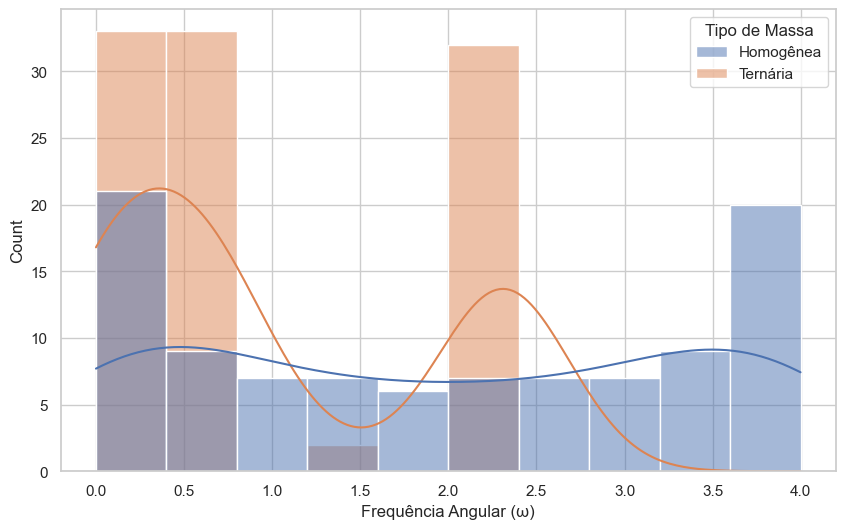

In [ ]:
n = 100
m1 = n*[1]
m2 = []
k = (n-1)*[1.0]
for i in range(1, n+1):
    if i%3 == 1:
        m2.append(1.0)
    elif i%3 == 2:
        m2.append(3.0)
    else:
        m2.append(5.0)

n1_sys100 = sys_resolve_atoms(n)
n1_sys100.create_matrix( m1, k, type = 'linear')
n1_freq100 = n1_sys100.get_frequencia_angular()

n2_sys100 = sys_resolve_atoms(n)
n2_sys100.create_matrix( m2, k, type = 'linear')
n2_freq100 = n2_sys100.get_frequencia_angular()

df1 = pd.DataFrame()

df1['Frequência Angular (ω)'] = list(n1_freq100)+list(n2_freq100)
df1['Tipo de Massa'] = ['Homogênea']*len(n1_freq100) + ['Ternária']*len(n2_freq100)

# sns.histplot(df1, x ='Frequência Angular (ω)', hue='Tipo de Massa' , kde=True, bins=10)

In [16]:
n = 1000
m1 = n*[1]
m2 = []
k = (n-1)*[1.0]
for i in range(1, n+1):
    if i%3 == 1:
        m2.append(1.0)
    elif i%3 == 2:
        m2.append(3.0)
    else:
        m2.append(5.0)

n1_sys1000 = sys_resolve_atoms(n)
n1_sys1000.create_matrix( m1, k, type = 'linear')
n1_freq1000 = n1_sys1000.get_frequencia_angular()

n2_sys1000 = sys_resolve_atoms(n)
n2_sys1000.create_matrix( m2, k, type = 'linear')
n2_freq1000 = n2_sys1000.get_frequencia_angular()

df2 = pd.DataFrame()

df2['Frequência Angular (ω)'] = list(n1_freq1000)+list(n2_freq1000)
df2['Tipo de Massa'] = ['Homogênea']*len(n1_freq1000) + ['Ternária']*len(n2_freq1000)

In [ ]:
n = 10000
m1 = n*[1]
m2 = []
k = (n-1)*[1.0]
for i in range(1, n+1):
    if i%3 == 1:
        m2.append(1.0)
    elif i%3 == 2:
        m2.append(3.0)
    else:
        m2.append(5.0)

n1_sys10000 = sys_resolve_atoms(n)
n1_sys10000.create_matrix( m1, k, type = 'linear')
n1_freq10000 = n1_sys10000.get_frequencia_angular()

n2_sys10000 = sys_resolve_atoms(n)
n2_sys10000.create_matrix( m2, k, type = 'linear')
n2_freq10000 = n2_sys10000.get_frequencia_angular()

df3 = pd.DataFrame()

df3['Frequência Angular (ω)'] = list(n1_freq10000)+list(n2_freq10000)
df3['Tipo de Massa'] = ['Homogênea']*len(n1_freq10000) + ['Ternária']*len(n2_freq10000)

In [ ]:
sns.histplot(df1, x ='Frequência Angular (ω)', hue='Tipo de Massa' , kde=True, bins=10)
sns.histplot(df2, x ='Frequência Angular (ω)', hue='Tipo de Massa' , kde=True, bins=10)
sns.histplot(df3, x ='Frequência Angular (ω)', hue='Tipo de Massa' , kde=True, bins=10)

In [8]:
freq_n1

array([3.28296418e-16, 9.86879269e-04, 3.94654314e-03, 8.87607079e-03,
       1.57705974e-02, 2.46233188e-02, 3.54254985e-02, 4.81664761e-02,
       6.28336777e-02, 7.94126286e-02, 9.78869674e-02, 1.18238462e-01,
       1.40447028e-01, 1.64490749e-01, 1.90345895e-01, 2.17986952e-01,
       2.47386640e-01, 2.78515946e-01, 3.11344149e-01, 3.45838851e-01,
       3.81966011e-01, 4.19689975e-01, 4.58973514e-01, 4.99777861e-01,
       5.42062745e-01, 5.85786438e-01, 6.30905788e-01, 6.77376269e-01,
       7.25152021e-01, 7.74185893e-01, 8.24429495e-01, 8.75833244e-01,
       9.28346410e-01, 9.81917168e-01, 1.03649265e+00, 1.09201900e+00,
       1.14844142e+00, 1.20570422e+00, 1.26375089e+00, 1.32252416e+00,
       1.38196601e+00, 1.44201779e+00, 1.50262023e+00, 1.56371352e+00,
       1.62523737e+00, 1.68713107e+00, 1.74933353e+00, 1.81178337e+00,
       1.87441896e+00, 1.93717848e+00, 2.00000000e+00, 2.06282152e+00,
       2.12558104e+00, 2.18821663e+00, 2.25066647e+00, 2.31286893e+00,
      

<Axes: ylabel='Count'>

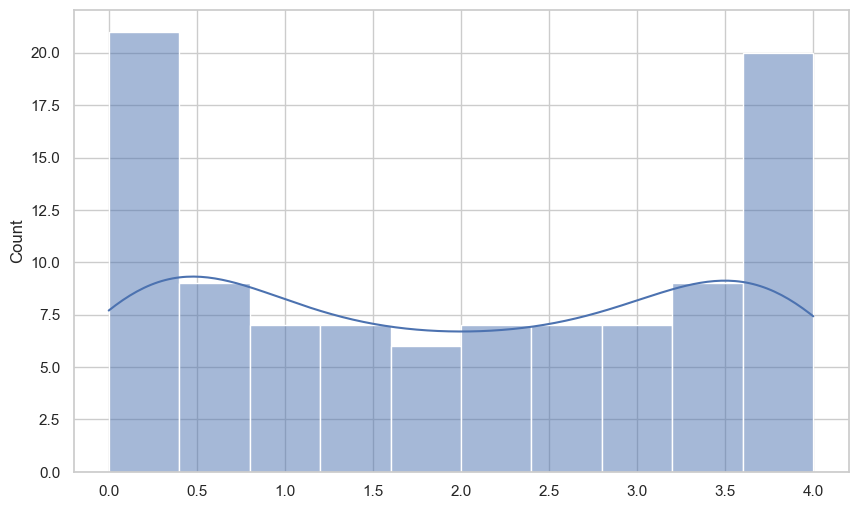

In [5]:
x = n1_sys.get_autovalores()

sns.histplot(x, kde=True, bins=10)

In [6]:
n1_sys.matrix

array([[ 1., -1.,  0., ...,  0.,  0.,  0.],
       [-1.,  2., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  2., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  2., -1.],
       [ 0.,  0.,  0., ...,  0., -1.,  1.]])

In [7]:
# Variação para 2 átomos (variando m2)
n_2 = 2
massas_2 = [1.0, 1.0] # m1, m2
ks_2 = [1.0, 1.0] # k12
valor_variacao_massa_2 = np.linspace(0.1, 5.0, 50) # Varia m2 de 0.1 a 5.0
plot_freq_vs_massa(n_2, massas_2, ks_2, 1, valor_variacao_massa_2, 
                         'Frequências Naturais vs. Massa 2 (Sistema de 2 Átomos)')

# Variação para 3 átomos (variando m2)
n_3 = 3
massas_3 = [1.0, 1.0, 1.0] # m1, m2, m3
ks_3 = [1.0, 1.0, 1.0] # k12, k23
valor_variacao_massa_3 = np.linspace(0.1, 5.0, 50) # Varia m2 de 0.1 a 5.0
plot_freq_vs_massa(n_3, massas_3, ks_3, 1, valor_variacao_massa_3, 
                         'Frequências Naturais vs. Massa 2 (Sistema de 3 Átomos)')

# --- 2. Gráficos dos modos normais para cada configuração ---



# Modos normais para 2 átomos
plot_modos_normais(2, [1.0, 1.0], [1.0, 1.0], 'Modos Normais (2 Átomos)', 'modos_normais_2_atoms.png')

# Modos normais para 3 átomos (massas iguais)
plot_modos_normais(3, [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], 'Modos Normais (3 Átomos - Massas Iguais)', 'modos_normais_3_atoms_equal.png')

# Modos normais para 3 átomos (uma massa diferente)
plot_modos_normais(3, [1.0, 2.0, 1.0], [1.0, 1.0, 1.0], 'Modos Normais (3 Átomos - Massa Central Maior)', 'modos_normais_3_atoms_middle_heavy.png')

# Coleta de dados para o relatório
report_data = {}

# 2 Átomos
system_2_report = sys_resolve_atoms(2)
system_2_report.create_matrix(m=[1.0, 1.0], k=[1.0, 1.0])
report_data['2_atoms_equal_massa_freq'] = system_2_report.get_frequencia_angular()
report_data['2_atoms_equal_massa_modos'] = system_2_report.get_autovetores()

# 3 Átomos (massas iguais)
system_3_equal_report = sys_resolve_atoms(3)
system_3_equal_report.create_matrix(m=[1.0, 1.0, 1.0], k=[1.0, 1.0, 1.0])
report_data['3_atoms_equal_massa_freq'] = system_3_equal_report.get_frequencia_angular()
report_data['3_atoms_equal_massa_modos'] = system_3_equal_report.get_autovetores()

# 3 Átomos (massa central maior)
system_3_middle_heavy_report = sys_resolve_atoms(3)
system_3_middle_heavy_report.create_matrix(m=[1.0, 2.0, 1.0], k=[1.0, 1.0, 1.0])
report_data['3_atoms_middle_heavy_freq'] = system_3_middle_heavy_report.get_frequencia_angular()
report_data['3_atoms_middle_heavy_modos'] = system_3_middle_heavy_report.get_autovetores()

# Salvar dados para uso no relatório (opcional, pode ser processado diretamente)
import json
with open('info.json', 'w') as f:
    json.dump({
        k: (v.tolist() if isinstance(v, np.ndarray) else v)
        for k, v in report_data.items()
    }, f, indent=4)




ValueError: Lista 'k' deve ter 1 elementos.